<a href="https://colab.research.google.com/github/Siripassornbibi/CP462_Project_Flood_Analysis_By_Budget/blob/main/CP462_Project_Flood_Analysis_By_Budget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CP462 Project:  Flood Analysis By Budget**

# หัวข้อ : Flood Analysis By Budget

**สมาชิก:**
<br>1) นายภูริณัฐ์ อมาตยวิศว์ (ID: 65102010126)
<br>2) นางสาวสิริภัสสร ศรีวัณโณ (ID : 65102010424)
<br><br>
**Dataset:**
<br>1)ข้อมูลพื้นที่เสี่ยงน้ำท่วมรายเดือนของแต่ละตำบลทั่วประเทศ ที่ผ่านการวิเคราะห์จาก shapefile พื้นที่น้ำท่วมจากภาพถ่ายดาวเทียมระหว่างปี 2548-2564 ของสำนักงานพัฒนาเทคโนโลยีอวกาศและภูมิสารสนเทศ (สทอภ.) >> **flood_dataframe**
<br>
2)databaseงบน้ำท่วม ปีงบประมาณ 2566 จาก Rocket Media Lab >> **budget_data_2023_dataframe**

**Source:**
<br>1)https://data.go.th/dataset/flood-area
<br>2)https://rocketmedialab.co/database-flood-budget/

**Slide**
<br>**Midterm:** https://www.canva.com/design/DAGSz7oOGrg/xVTOyBQEirvx44FVxS6xRw/edit?utm_content=DAGSz7oOGrg&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton
<br>**Final:** https://www.canva.com/design/DAGXUiDo_dM/ITZT73Jqy_9SPJ_qRG5RSw/edit?utm_content=DAGXUiDo_dM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

# Setup

## Import Packages

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Mount google drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


## Import Thai Sarabun font

In [ ]:
import matplotlib.font_manager as fm

# โหลดฟอนต์ TH Sarabun เพื่อใช้งานใน matplotlib
font_path = 'drive/MyDrive/Source_Data_CP462/project/font/THSarabunNew.ttf'  # ระบุตำแหน่งของฟอนต์
prop = fm.FontProperties(fname=font_path)

## Import Shapefile

In [ ]:
# Load the shapefile (replace with your actual file path)
shapefile_path = '/content/drive/MyDrive/Source_Data_CP462/project/thailand_provinces_data/thailand_provinces.shp'
gdf = gpd.read_file(shapefile_path)
gdf.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_TH,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1TH,ADM1ALT2TH,ADM0_EN,ADM0_TH,ADM0_PCODE,date,validOn,validTo,geometry
0,3.927244,0.275313,Amnat Charoen,อำนาจเจริญ,TH37,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,0000/00/00,"POLYGON ((104.95982 16.28359, 104.95986 16.283..."
1,1.739908,0.079210,Ang Thong,อ่างทอง,TH15,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,0000/00/00,"POLYGON ((100.33319 14.79853, 100.33341 14.798..."
2,2.417227,0.131339,Bangkok,กรุงเทพมหานคร,TH10,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,0000/00/00,"POLYGON ((100.61389 13.95462, 100.61428 13.954..."
3,4.414998,0.340784,Bueng Kan,บึงกาฬ,TH38,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,0000/00/00,"POLYGON ((103.40497 18.44898, 103.40619 18.448..."
4,8.701860,0.844537,Buri Ram,บุรีรัมย์,TH31,None,None,None,None,None,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,0000/00/00,"POLYGON ((102.93029 15.79514, 102.93029 15.795..."


# Build a DataFrame

## Import Dataset

### Flood Dataframe

1) ข้อมูลพื้นที่เสี่ยงน้ำท่วมรายเดือนของแต่ละตำบลทั่วประเทศ ที่ผ่านการวิเคราะห์จาก shapefile พื้นที่น้ำท่วมจากภาพถ่ายดาวเทียมระหว่างปี 2548-2564 ของสำนักงานพัฒนาเทคโนโลยีอวกาศและภูมิสารสนเทศ (สทอภ.) >>  **flood_dataframe**
<br>

In [ ]:
flood_dataframe = pd.read_csv('drive/MyDrive/Source_Data_CP462/project/data/monthly-flood-risk-area.csv')

flood_dataframe.head()

,Month,GEOCODE,TAMBON_T,TAMBON_E,AMPHOE_CODE,AMPHOE_T,AMPHOE_E,PROV_CODE,PROV_T,PROV_E,COUNT 17 YEAR,CRITERIA,RISK
0,1,120501,ต.ไทรน้อย,Sai Noi,1205,อ.ไทรน้อย,Sai Noi District,12,จ.นนทบุรี,Nonthaburi,1,1-3 ครั้งในรอบ 17 ปี,เสี่ยงต่ำ
1,1,120503,ต.หนองเพรางาย,Nong Phrao Ngai,1205,อ.ไทรน้อย,Sai Noi District,12,จ.นนทบุรี,Nonthaburi,1,1-3 ครั้งในรอบ 17 ปี,เสี่ยงต่ำ
2,1,120504,ต.ไทรใหญ่,Sai Yai,1205,อ.ไทรน้อย,Sai Noi District,12,จ.นนทบุรี,Nonthaburi,1,1-3 ครั้งในรอบ 17 ปี,เสี่ยงต่ำ
3,1,120505,ต.ขุนศรี,Khun Si,1205,อ.ไทรน้อย,Sai Noi District,12,จ.นนทบุรี,Nonthaburi,1,1-3 ครั้งในรอบ 17 ปี,เสี่ยงต่ำ
4,1,120507,ต.ทวีวัฒนา,Thawi Watthana,1205,อ.ไทรน้อย,Sai Noi District,12,จ.นนทบุรี,Nonthaburi,1,1-3 ครั้งในรอบ 17 ปี,เสี่ยงต่ำ


### Budget Dataframe

2)databaseงบน้ำท่วม ปีงบประมาณ 2566 จาก Rocket Media Lab >> **budget_data_2023_dataframe**

In [ ]:
names=['region', 'province', 'ministry', 'department', 'plan', 'project', 'goal', 'budget type', 'result', 'category', 'description', 'unit', 'quantity', 'price', 'job description', 'type of work']
budget_data_2023_dataframe = pd.read_csv('drive/MyDrive/Source_Data_CP462/project/data/flood_budget_2023.csv', header=0, names=names)

budget_data_2023_dataframe.head()

,region,province,ministry,department,plan,project,goal,budget type,result,category,description,unit,quantity,price,job description,type of work
0,กลาง,กำแพงเพชร,กระทรวงเกษตรและสหกรณ์,กรมชลประทาน,แผนงานบูรณาการบริหารจัดการทรัพยากรน้ำ,โครงการจัดหาแหล่งน้ำและเพิ่มพื้นที่ชลประทาน,ก่อสร้างและพัฒนาแหล่งน้ำขนาดกลาง,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าก่อสร้างแหล่งน้ำ,ก่อสร้างฝายชั่วคราวกั้นแม่น้ำปิงหนองวัวดำ พร้อ...,NaN,0.0,"62,880,000",ปรับปรุงซ่อมแซมเขื่อน ฝาย อ่างเก็บน้ำ,บำรุงรักษา
1,กลาง,กำแพงเพชร,กระทรวงเกษตรและสหกรณ์,กรมชลประทาน,แผนงานยุทธศาสตร์เพื่อสนับสนุนด้านการสร้างการเต...,โครงการสนับสนุนการบริหารจัดการน้ำและงานชลประทาน,สนับสนุนการบริหารจัดการน้ำชลประทาน,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,กำจัดวัชพืช ( โดยเครื่องจักร ) ในเขตฝ่ายส่งน้ำ...,NaN,0.0,"750,000",ขุดลอกและกำจัดวัชพืช,บำรุงรักษา
2,กลาง,กำแพงเพชร,กระทรวงเกษตรและสหกรณ์,กรมชลประทาน,แผนงานยุทธศาสตร์เพื่อสนับสนุนด้านการสร้างการเต...,โครงการสนับสนุนการบริหารจัดการน้ำและงานชลประทาน,สนับสนุนการบริหารจัดการน้ำชลประทาน,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,กำจัดวัชพืช ( โดยเครื่องจักร ) ในเขตฝ่ายส่งน้ำ...,NaN,0.0,"2,900,000",ขุดลอกและกำจัดวัชพืช,บำรุงรักษา
3,กลาง,กำแพงเพชร,กระทรวงเกษตรและสหกรณ์,กรมชลประทาน,แผนงานยุทธศาสตร์เพื่อสนับสนุนด้านการสร้างการเต...,โครงการสนับสนุนการบริหารจัดการน้ำและงานชลประทาน,สนับสนุนการบริหารจัดการน้ำชลประทาน,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,กำจัดวัชพืช ( โดยเครื่องจักร ) ในเขตฝ่ายส่งน้ำ...,NaN,0.0,"1,800,000",ขุดลอกและกำจัดวัชพืช,บำรุงรักษา
4,กลาง,กำแพงเพชร,กระทรวงเกษตรและสหกรณ์,กรมชลประทาน,แผนงานยุทธศาสตร์เพื่อสนับสนุนด้านการสร้างการเต...,โครงการสนับสนุนการบริหารจัดการน้ำและงานชลประทาน,สนับสนุนการบริหารจัดการน้ำชลประทาน,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,กำจัดวัชพืช ( โดยเครื่องจักร ) ในเขตฝ่ายส่งน้ำ...,NaN,0.0,"1,100,000",ขุดลอกและกำจัดวัชพืช,บำรุงรักษา


# Cleansing Data

## ข้อมูลน้ำท่วม (Flood Dataframe)

### ข้อมูลก่อนทำความสะอาด

In [ ]:
#BEFORE of datatype flood_dataframe
flood_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27023 entries, 0 to 27022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          27023 non-null  int64 
 1   GEOCODE        27023 non-null  int64 
 2   TAMBON_T       27023 non-null  object
 3   TAMBON_E       27023 non-null  object
 4   AMPHOE_CODE    27023 non-null  int64 
 5   AMPHOE_T       27023 non-null  object
 6   AMPHOE_E       27023 non-null  object
 7   PROV_CODE      27023 non-null  int64 
 8   PROV_T         27023 non-null  object
 9   PROV_E         27023 non-null  object
 10  COUNT 17 YEAR  27023 non-null  int64 
 11  CRITERIA       27023 non-null  object
 12  RISK           27023 non-null  object
dtypes: int64(5), object(8)
memory usage: 2.7+ MB


### หาค่าซ้ำและจัดการกับข้อมูลซ้ำ

In [ ]:
flood_dataframe.duplicated().sum()

0

### หาข้อมูลที่สูญหายและจัดการกับข้อมูลที่สูญหาย

In [ ]:
#ไม่พบค่าว่างในตารางแรก
flood_dataframe.isnull().any()

,0
Month,False
GEOCODE,False
TAMBON_T,False
TAMBON_E,False
AMPHOE_CODE,False
AMPHOE_T,False
AMPHOE_E,False
PROV_CODE,False
PROV_T,False
PROV_E,False


#### เช็คว่าแต่ละจังหวัดมีเดือนครบไหม
 สังเกตุได้ว่าในแต่ละจังหวัดจะมีเดือนไม่เท่ากัน คาดการณ์ว่าเดือนนั้นดาวเทียมอาจมองไม่เห็น

In [ ]:
# Group by province and get unique months
months_per_province = flood_dataframe.groupby('PROV_T')['Month'].unique().reset_index()

# Rename the columns for clarity
months_per_province.columns = ['Province', 'Months']

# Display the result
months_per_province

,Province,Months
0,กรุงเทพมหานคร,"[6, 9, 10, 11, 12]"
1,จ.กระบี่,[4]
2,จ.กาญจนบุรี,"[5, 6, 9, 10, 11]"
3,จ.กาฬสินธุ์,"[7, 8, 9, 10, 11, 12]"
4,จ.กำแพงเพชร,"[5, 6, 7, 8, 9, 10, 11, 12]"
...,...,...
70,จ.เพชรบุรี,"[6, 8, 9, 10, 11]"
71,จ.เพชรบูรณ์,"[5, 6, 7, 8, 9, 10, 11]"
72,จ.เลย,"[5, 6, 7, 8, 9, 10]"
73,จ.แพร่,"[5, 6, 7, 8, 9]"


In [ ]:
flood_dataframe['PROV_T'].nunique()

75

### กำจัด prefix บนข้อมูล

In [ ]:
flood_dataframe['PROV_T'] = flood_dataframe['PROV_T'].str.replace('จ.', '')
flood_dataframe['TAMBON_T'] = flood_dataframe['TAMBON_T'].str.replace('ต.', '')
flood_dataframe['AMPHOE_T'] = flood_dataframe['AMPHOE_T'].str.replace('อ.', '')

### ผลลัพธ์หลังทำความสะอาดข้อมูล

In [ ]:
#AFTER of datatype flood_dataframe
flood_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27023 entries, 0 to 27022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          27023 non-null  int64 
 1   GEOCODE        27023 non-null  int64 
 2   TAMBON_T       27023 non-null  object
 3   TAMBON_E       27023 non-null  object
 4   AMPHOE_CODE    27023 non-null  int64 
 5   AMPHOE_T       27023 non-null  object
 6   AMPHOE_E       27023 non-null  object
 7   PROV_CODE      27023 non-null  int64 
 8   PROV_T         27023 non-null  object
 9   PROV_E         27023 non-null  object
 10  COUNT 17 YEAR  27023 non-null  int64 
 11  CRITERIA       27023 non-null  object
 12  RISK           27023 non-null  object
dtypes: int64(5), object(8)
memory usage: 2.7+ MB


## ข้อมูลงบประมาณ(Budget Dataframe)

### ข้อมูลก่อนทำความสะอาด

In [ ]:
budget_data_2023_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6511 entries, 0 to 6510
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           6511 non-null   object 
 1   province         6511 non-null   object 
 2   ministry         6511 non-null   object 
 3   department       6511 non-null   object 
 4   plan             6511 non-null   object 
 5   project          6511 non-null   object 
 6   goal             6511 non-null   object 
 7   budget type      6511 non-null   object 
 8   result           6156 non-null   object 
 9   category         6482 non-null   object 
 10  description      6511 non-null   object 
 11  unit             2893 non-null   object 
 12  quantity         6474 non-null   float64
 13  price            6511 non-null   object 
 14  job description  6511 non-null   object 
 15  type of work     6511 non-null   object 
dtypes: float64(1), object(15)
memory usage: 814.0+ KB


### หาค่าซ้ำและจัดการกับข้อมูลซ้ำ

In [ ]:
budget_data_2023_dataframe.duplicated().sum()

45

In [ ]:
duplicated = budget_data_2023_dataframe.duplicated()
duplicated[duplicated]
budget_data_2023_dataframe[duplicated]

,region,province,ministry,department,plan,project,goal,budget type,result,category,description,unit,quantity,price,job description,type of work
175,กลาง,ชัยนาท,จังหวัดและกลุ่มจังหวัด,จังหวัดชัยนาท,แผนงานยุทธศาสตร์ส่งเสริมการพัฒนาจังหวัดและกลุ่...,โครงการบริหารจัดการด้านทรัพยากรธรรมชาติและสิ่ง...,โครงการก่อสร้างเขื่อนป้องกันตลิ่งริมแม่น้ำและร...,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าก่อสร้างแหล่งน้ำ,ก่อสร้างเขื่อนป้องกันตลิ่งริมแม่น้ำและระบบป้อง...,แห่ง,1.0,"15,549,000",ก่อสร้างเขื่อนป้องกันตลิ่ง,สร้าง
1802,กลาง-กรุงเทพ,กรุงเทพมหานคร,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,กรมทรัพยากรน้ำ,แผนงานพื้นฐานด้านการสร้างการเติบโตบนคุณภาพชีวิ...,การเพิ่มศักยภาพระบบพยากรณ์และเตือนภัยด้านน้ำ,เพิ่มประสิทธิภาพการบริหารจัดการการพยากรณ์และเต...,งบรายจ่ายอื่น,NaN,NaN,ค่าใช้จ่ายในการซ่อมแซมระบบเตือนภัยน้ำท่วม - ดิ...,รายการ,1.0,"26,800,000",ติดตั้งและบำรุงรักษาระบบเตือนภัย,บำรุงรักษา
1803,กลาง-กรุงเทพ,กรุงเทพมหานคร,กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม,กรมทรัพยากรน้ำ,แผนงานพื้นฐานด้านการสร้างการเติบโตบนคุณภาพชีวิ...,การเพิ่มศักยภาพระบบพยากรณ์และเตือนภัยด้านน้ำ,เพิ่มประสิทธิภาพการบริหารจัดการการพยากรณ์และเต...,งบรายจ่ายอื่น,NaN,NaN,ค่าใช้จ่ายในการบำรุงรักษาระบบเตือนภัยน้ำท่วม -...,รายการ,1.0,"18,552,000",ติดตั้งและบำรุงรักษาระบบเตือนภัย,บำรุงรักษา
1959,กลาง-กรุงเทพ,กรุงเทพมหานคร,กระทรวงเกษตรและสหกรณ์,กรมชลประทาน,แผนงานยุทธศาสตร์เพื่อสนับสนุนด้านการสร้างการเต...,โครงการสนับสนุนการบริหารจัดการน้ำและงานชลประทาน,สนับสนุนการบริหารจัดการน้ำชลประทาน,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,กำจัดวัชพืชโดยแรงคน จำนวน 3 สายคลอง ปริมาณ 90 ...,NaN,0.0,"291,700",ขุดลอกและกำจัดวัชพืช,บำรุงรักษา
1960,กลาง-กรุงเทพ,กรุงเทพมหานคร,กระทรวงเกษตรและสหกรณ์,กรมชลประทาน,แผนงานยุทธศาสตร์เพื่อสนับสนุนด้านการสร้างการเต...,โครงการสนับสนุนการบริหารจัดการน้ำและงานชลประทาน,สนับสนุนการบริหารจัดการน้ำชลประทาน,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,กำจัดวัชพืชคลองลำปลาทิว ( โดยเครื่องจักร ) ปริ...,NaN,0.0,"800,000",ขุดลอกและกำจัดวัชพืช,บำรุงรักษา
1969,กลาง-กรุงเทพ,กรุงเทพมหานคร,กระทรวงเกษตรและสหกรณ์,กรมชลประทาน,แผนงานยุทธศาสตร์เพื่อสนับสนุนด้านการสร้างการเต...,โครงการสนับสนุนการบริหารจัดการน้ำและงานชลประทาน,สนับสนุนการบริหารจัดการน้ำชลประทาน,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,ซ่อมแซม ทรบ . คลองจักร ฝ่ายส่งน้ำและบำรุงรักษา...,NaN,0.0,"380,000",ซ่อมแซมประตูระบายน้ำ ทางระบายน้ำ คลองส่งน้ำ ระ...,บำรุงรักษา
1970,กลาง-กรุงเทพ,กรุงเทพมหานคร,กระทรวงเกษตรและสหกรณ์,กรมชลประทาน,แผนงานยุทธศาสตร์เพื่อสนับสนุนด้านการสร้างการเต...,โครงการสนับสนุนการบริหารจัดการน้ำและงานชลประทาน,สนับสนุนการบริหารจัดการน้ำชลประทาน,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,ซ่อมแซม ทรบ . นาหมอน ฝ่ายส่งน้ำและบำรุงรักษาที...,NaN,0.0,"380,000",ซ่อมแซมประตูระบายน้ำ ทางระบายน้ำ คลองส่งน้ำ ระ...,บำรุงรักษา
1971,กลาง-กรุงเทพ,กรุงเทพมหานคร,กระทรวงเกษตรและสหกรณ์,กรมชลประทาน,แผนงานยุทธศาสตร์เพื่อสนับสนุนด้านการสร้างการเต...,โครงการสนับสนุนการบริหารจัดการน้ำและงานชลประทาน,สนับสนุนการบริหารจัดการน้ำชลประทาน,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,ซ่อมแซม ทรบ . บึงเตย ฝ่ายส่งน้ำและบำรุงรักษาที...,NaN,0.0,"380,000",ซ่อมแซมประตูระบายน้ำ ทางระบายน้ำ คลองส่งน้ำ ระ...,บำรุงรักษา
1972,กลาง-กรุงเทพ,กรุงเทพมหานคร,กระทรวงเกษตรและสหกรณ์,กรมชลประทาน,แผนงานยุทธศาสตร์เพื่อสนับสนุนด้านการสร้างการเต...,โครงการสนับสนุนการบริหารจัดการน้ำและงานชลประทาน,สนับสนุนการบริหารจัดการน้ำชลประทาน,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,ซ่อมแซม ทรบ . บึงปรง ฝ่ายส่งน้ำและบำรุงรักษาที...,NaN,0.0,"380,000",ซ่อมแซมประตูระบายน้ำ ทางระบายน้ำ คลองส่งน้ำ ระ...,บำรุงรักษา
1973,กลาง-กรุงเทพ,กรุงเทพมหานคร,กระทรวงเกษตรและสหกรณ์,กรมชลประทาน,แผนงานยุทธศาสตร์เพื่อสนับสนุนด้านการสร้างการเต...,โครงการสนับสนุนการบริหารจัดการน้ำและงานชลประทาน,สนับสนุนการบริหารจัดการน้ำชลประทาน,งบลงทุน,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,ซ่อมแซมบานระบายและเกียร์มอเตอร์ปตร . หนองจอก 1...,NaN,0.0,"950,000",ซ่อมแซมประตูระบายน้ำ ทางระบายน้ำ คลองส่งน้ำ ระ...,บำรุงรักษา


ทำการลบแถวที่ซ้ำกัน

In [ ]:
budget_data_2023_dataframe = budget_data_2023_dataframe.drop_duplicates()

duplicates_count = budget_data_2023_dataframe.duplicated().sum()
print(f"จำนวนข้อมูลที่ซ้ำกันหลังจากลบ: {duplicates_count}")

จำนวนข้อมูลที่ซ้ำกันหลังจากลบ: 0


In [ ]:
budget_data_2023_dataframe['province'].nunique()

77

### หาข้อมูลที่สูญหายและจัดการกับข้อมูลที่สูญหาย

In [ ]:
budget_data_2023_dataframe.isnull().any()

,0
region,False
province,False
ministry,False
department,False
plan,False
project,False
goal,False
budget type,False
result,True
category,True


เนื่องจากข้อมูลที่มีข้อมูลสูญหายไม่ได้ส่งผลต่อการคำนวณจึงตัดสินใจไม่ทำอะไร

In [ ]:
row_with_missing_columns = budget_data_2023_dataframe[budget_data_2023_dataframe.isnull().any(axis=1)]


row_with_missing_columns[budget_data_2023_dataframe.columns[budget_data_2023_dataframe.isnull().any()].tolist()]

,result,category,unit,quantity
0,ที่ดิน สิ่งก่อสร้าง,ค่าก่อสร้างแหล่งน้ำ,NaN,0.0
1,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,NaN,0.0
2,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,NaN,0.0
3,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,NaN,0.0
4,ที่ดิน สิ่งก่อสร้าง,ค่าปรับปรุงแหล่งน้ำ,NaN,0.0
...,...,...,...,...
6503,ที่ดิน สิ่งก่อสร้าง,ค่าก่อสร้างแหล่งน้ำ,NaN,0.0
6504,ที่ดิน สิ่งก่อสร้าง,ค่าก่อสร้างแหล่งน้ำ,NaN,0.0
6505,ที่ดิน สิ่งก่อสร้าง,ค่าก่อสร้างแหล่งน้ำ,NaN,0.0
6506,NaN,ค่าที่ดินและสิ่งก่อสร้าง,สาย,1.0


### กำจัด prefix บนข้อมูล

In [ ]:
budget_data_2023_dataframe['price'] = budget_data_2023_dataframe['price'].str.replace(',', '')
budget_data_2023_dataframe['price'] = pd.to_numeric(budget_data_2023_dataframe['price'])

### ผลลัพธ์หลังทำความสะอาดข้อมูล

In [ ]:
budget_data_2023_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6466 entries, 0 to 6510
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           6466 non-null   object 
 1   province         6466 non-null   object 
 2   ministry         6466 non-null   object 
 3   department       6466 non-null   object 
 4   plan             6466 non-null   object 
 5   project          6466 non-null   object 
 6   goal             6466 non-null   object 
 7   budget type      6466 non-null   object 
 8   result           6113 non-null   object 
 9   category         6439 non-null   object 
 10  description      6466 non-null   object 
 11  unit             2858 non-null   object 
 12  quantity         6429 non-null   float64
 13  price            6466 non-null   int64  
 14  job description  6466 non-null   object 
 15  type of work     6466 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 858.8+ KB


# Explore Global Properties

## ข้อมูลน้ำท่วม (Flood Dataframe)

### หาการกระจายตัวของจำนวนที่น้ำท่วมในรอบ 17 ปี

<Axes: xlabel='COUNT 17 YEAR'>

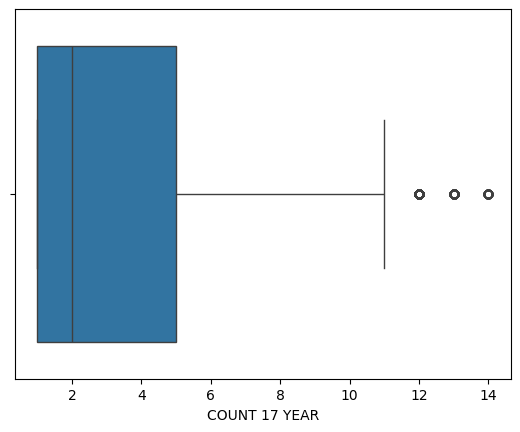

In [ ]:
sns.boxplot(x=flood_dataframe["COUNT 17 YEAR"])

### หาค่าทางสถิติ (Central tendency, Spread)

In [ ]:
flood_dataframe['COUNT 17 YEAR'].describe()

,COUNT 17 YEAR
count,27023.000000
mean,3.294897
std,2.981259
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,14.000000


## ข้อมูลงบประมาณ (Budget Dataframe)

### หาการกระจายตัวของจำนวนงบประมาณ

<Axes: xlabel='price'>

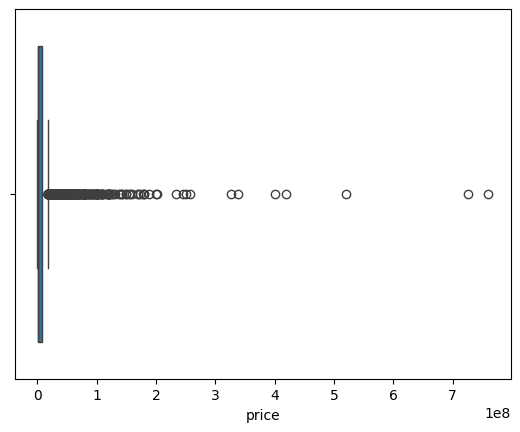

In [ ]:
sns.boxplot(x=budget_data_2023_dataframe['price'])

### หาค่าทางสถิติ (Central tendency, Spread)

In [ ]:
budget_data_2023_dataframe['price'].describe()

,price
count,6.466000e+03
mean,8.196753e+06
std,2.452253e+07
min,4.500000e+03
25%,4.985000e+05
50%,1.150000e+06
75%,7.415400e+06
max,7.600000e+08


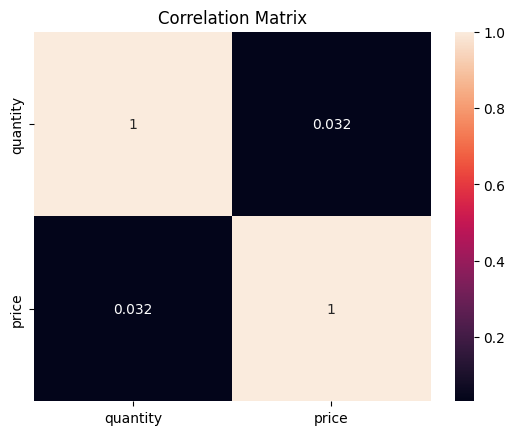

In [ ]:
columns_of_interest = ['quantity', 'price']
correlation_matrix = budget_data_2023_dataframe[columns_of_interest].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
groupby_province = budget_data_2023_dataframe.groupby('province').sum('price')
groupby_province

,quantity,price
province,,
กระบี่,9.0,242600000
กรุงเทพมหานคร,1176.0,3640909800
กาญจนบุรี,113.0,814392600
กาฬสินธุ์,26.0,179259000
กำแพงเพชร,18.0,527352500
...,...,...
เพชรบุรี,105.0,557989600
เพชรบูรณ์,396.0,451559800
เลย,119.0,1257362900


# Explore Group Properties

## ค่าเฉลี่ยจำนวนครั้งที่ท่วมในแต่ละจังหวัด

### Barchart

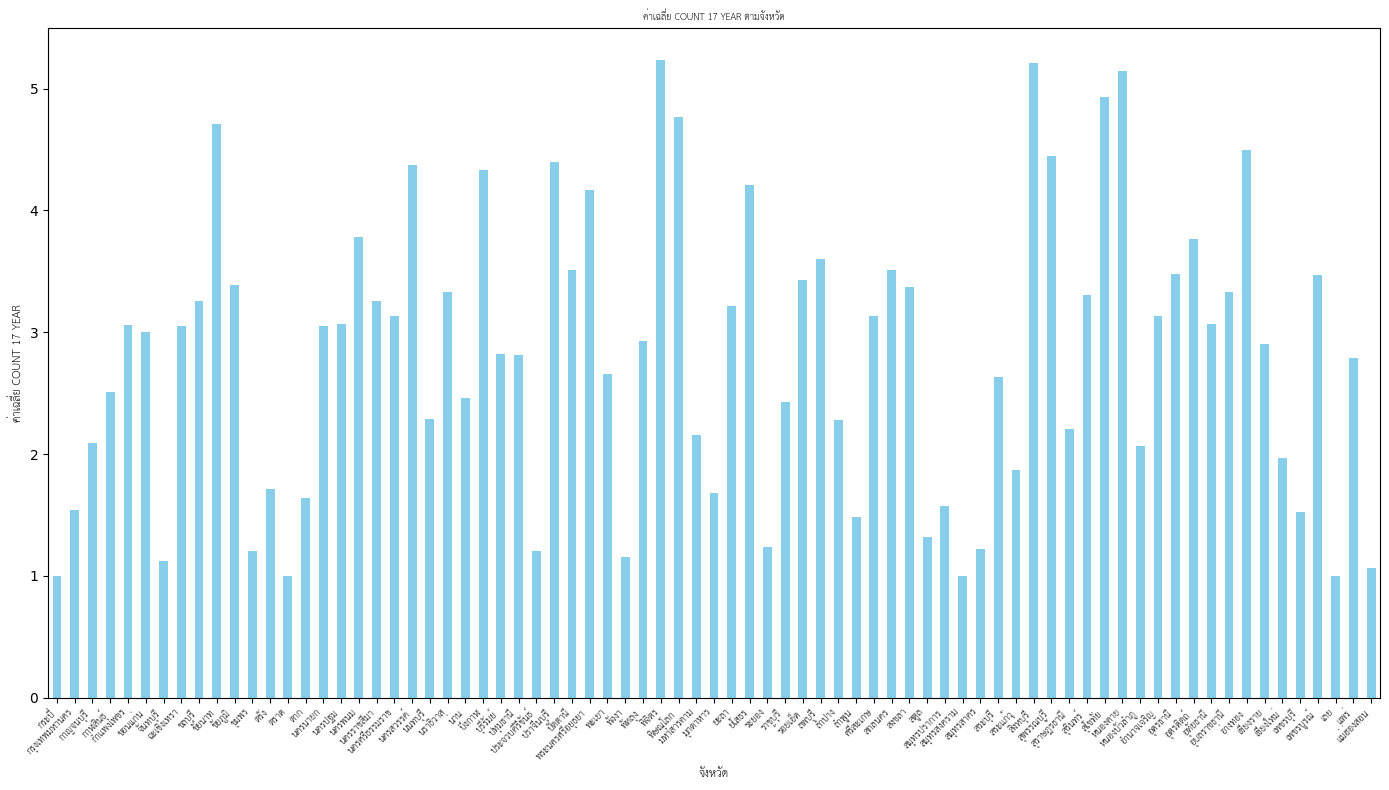

In [ ]:
grouped_data = flood_dataframe.groupby('PROV_T')['COUNT 17 YEAR'].mean()

plt.figure(figsize=(14, 8))
grouped_data.plot(kind='bar', color='skyblue')

plt.title('ค่าเฉลี่ย COUNT 17 YEAR ตามจังหวัด', fontsize=16,fontproperties=prop)
plt.xlabel('จังหวัด', fontsize=12,fontproperties=prop)
plt.ylabel('ค่าเฉลี่ย COUNT 17 YEAR', fontsize=12,fontproperties=prop)
plt.xticks(rotation=45, ha='right',fontproperties=prop)
plt.tight_layout()

plt.show()

### Map Plot

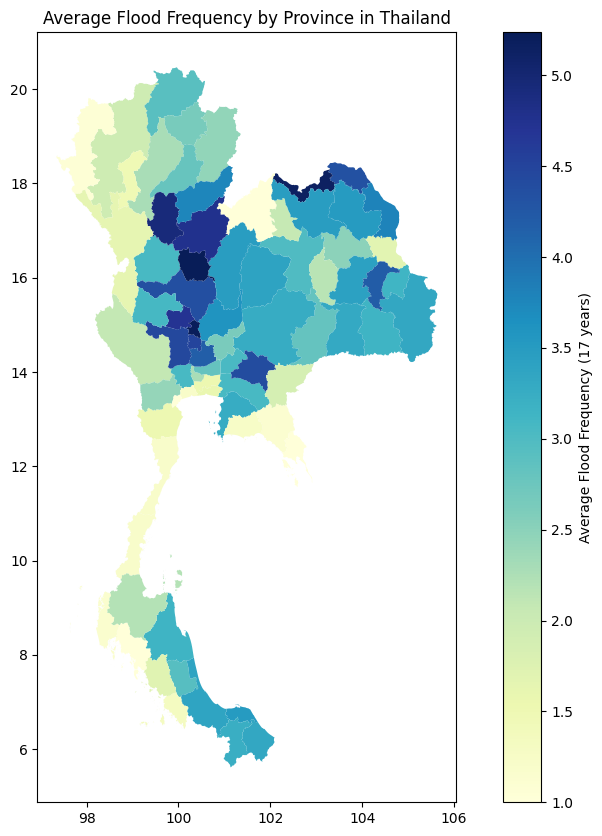

In [ ]:
#แผนภูมิแสดงค่าเฉลี่ยนของความถี่น้ำท่วมของแต่ละจังหวัง
grouped_data = flood_dataframe.groupby('PROV_T')['COUNT 17 YEAR'].mean()

# Ensure the province names in the shapefile match with the flood data
# Merge the GeoDataFrame with the flood frequency data
merged_gdf = gdf.merge(grouped_data, left_on='ADM1_TH', right_on='PROV_T')

# Plot the map with flood frequency
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_gdf.plot(column='COUNT 17 YEAR', cmap='YlGnBu', legend=True, ax=ax,
                legend_kwds={'label': "Average Flood Frequency (17 years)",
                             'orientation': "vertical"})
plt.title("Average Flood Frequency by Province in Thailand")
plt.show()


## จำนวนงบประมาณในแต่ละจังหวัด

### Barchart

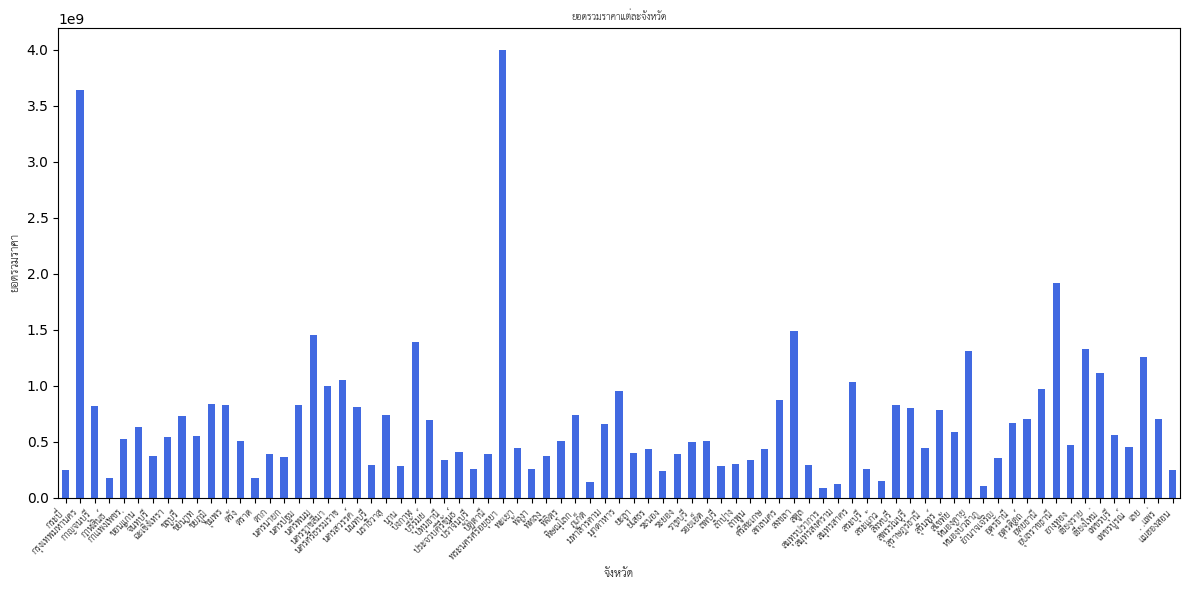

In [ ]:
# สมมุติว่าข้อมูลถูก group และ sum 'price' ตามจังหวัดแล้ว
groupby_province = budget_data_2023_dataframe.groupby('province').sum('price')

# สร้าง bar chart
plt.figure(figsize=(12, 6))
groupby_province['price'].plot(kind='bar', color='royalblue')

# ตั้งค่าให้แสดงผลภาษาไทย
plt.title('ยอดรวมราคาแต่ละจังหวัด', fontsize=16, fontproperties=prop)
plt.xlabel('จังหวัด', fontsize=12, fontproperties=prop)
plt.ylabel('ยอดรวมราคา', fontsize=12, fontproperties=prop)
plt.xticks(rotation=45, ha='right', fontproperties=prop)  # หมุนชื่อจังหวัดและใช้ฟอนต์ไทย
plt.tight_layout()

# แสดงกราฟ
plt.show()

### Map Plot

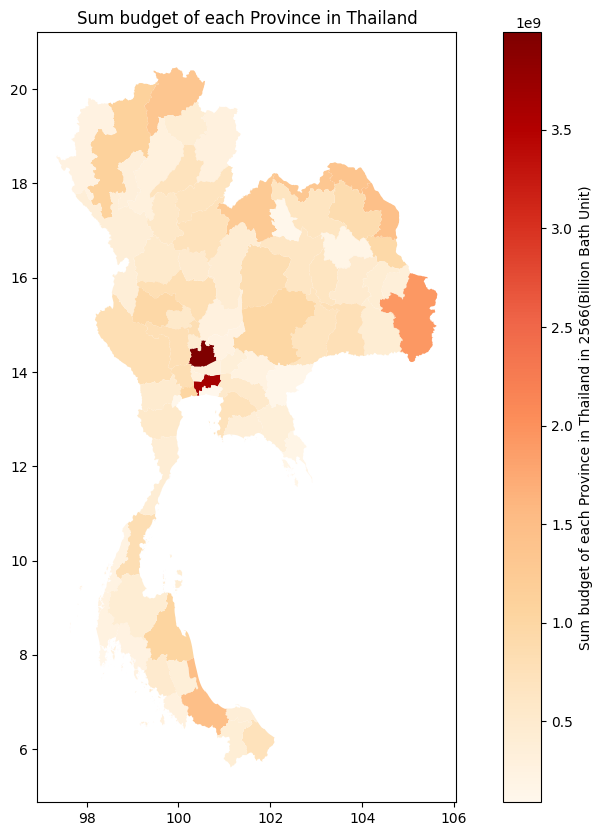

In [ ]:
groupby_province = budget_data_2023_dataframe.groupby('province').sum('price')
merged_gdf = gdf.merge(groupby_province, left_on='ADM1_TH', right_on='province')

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_gdf.plot(column='price', cmap='OrRd', legend=True, ax=ax,
                legend_kwds={'label': "Sum budget of each Province in Thailand in 2566(Billion Bath Unit)",
                             'orientation': "vertical"})
plt.title("Sum budget of each Province in Thailand")
plt.show()

## สรุปข้อมูลจำนวนน้ำท่วมต่องบประมาณ

           PROV_T  Avg_COUNT_17_YEAR       province  Total_Price
0          กระบี่           1.000000         กระบี่    242600000
1   กรุงเทพมหานคร           1.539773  กรุงเทพมหานคร   3640909800
2       กาญจนบุรี           2.087302      กาญจนบุรี    814392600
3       กาฬสินธุ์           2.505618      กาฬสินธุ์    179259000
4       กำแพงเพชร           3.057613      กำแพงเพชร    527352500
..            ...                ...            ...          ...
70       เพชรบุรี           1.523207       เพชรบุรี    557989600
71      เพชรบูรณ์           3.471698      เพชรบูรณ์    451559800
72            เลย           1.000000            เลย   1257362900
73           แพร่           2.788136           แพร่    701481500
74     แม่ฮ่องสอน           1.063830     แม่ฮ่องสอน    244435200

[75 rows x 4 columns]


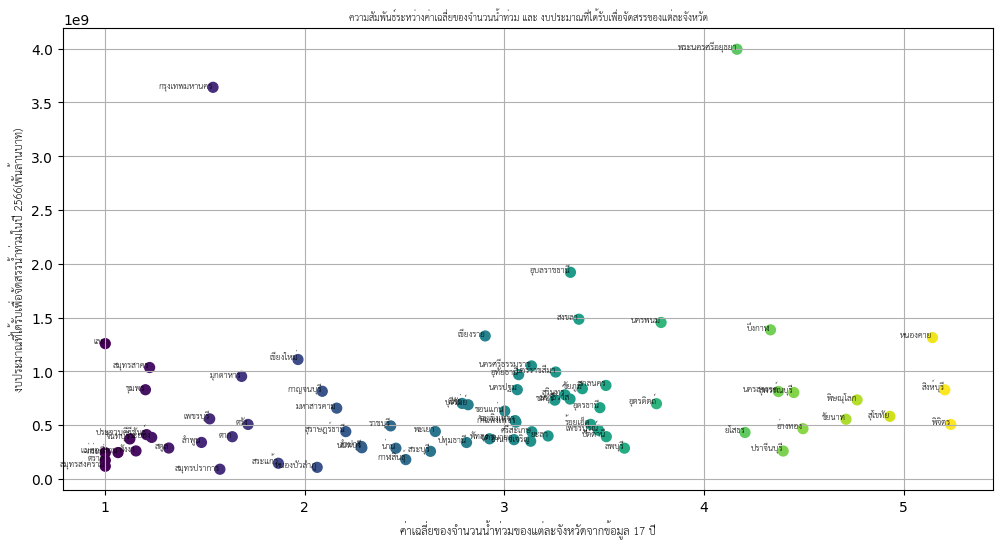

In [ ]:
# ค่าเฉลี่ยของจำนวนน้ำท่วมของแต่ละจังหวัดจากข้อมูล 17 ปี
grouped_data = flood_dataframe.groupby('PROV_T')['COUNT 17 YEAR'].mean().reset_index()

# งบประมาณที่ได้รับเพื่อจัดสรรน้ำท่วมในปี 2566(พันล้านบาท)
groupby_province = budget_data_2023_dataframe.groupby('province')['price'].sum().reset_index()

# เปลี่ยนชื่อคอลัมน์ใน DataFrame เพื่อไม่ให้ซ้ำกัน
grouped_data.rename(columns={'COUNT 17 YEAR': 'Avg_COUNT_17_YEAR'}, inplace=True)
groupby_province.rename(columns={'price': 'Total_Price'}, inplace=True)

# ทำการ join ข้อมูลตามจังหวัด โดยระบุชื่อคอลัมน์ที่แตกต่างกัน
merged_data = pd.merge(grouped_data, groupby_province, left_on='PROV_T', right_on='province')

# แสดงข้อมูลที่ merged
print(merged_data)

# สร้าง scatter plot เพื่อตรวจสอบความสัมพันธ์
plt.figure(figsize=(12, 6))
scatter = plt.scatter(merged_data['Avg_COUNT_17_YEAR'],
                      merged_data['Total_Price'],
                      c=merged_data['Avg_COUNT_17_YEAR'],  # หรือใช้ 'Total_Price' ก็ได้
                      cmap='viridis',
                      s=50)  # s คือขนาดของจุด


# แสดงชื่อจังหวัดในแต่ละจุดข้อมูล
for i in range(len(merged_data)):
    plt.text(merged_data['Avg_COUNT_17_YEAR'].iloc[i],
             merged_data['Total_Price'].iloc[i],
             merged_data['province'].iloc[i],  # หรือใช้ 'PROV_T' ขึ้นอยู่กับ DataFrame
             fontsize=9,
             ha='right',
             fontproperties=prop
             )

# ตั้งค่าให้แสดงผล
plt.title('ความสัมพันธ์ระหว่างค่าเฉลี่ยของจำนวนน้ำท่วม และ งบประมาณที่ได้รับเพื่อจัดสรรของแต่ละจังหวัด', fontsize=30, fontproperties=prop)
plt.xlabel('ค่าเฉลี่ยของจำนวนน้ำท่วมของแต่ละจังหวัดจากข้อมูล 17 ปี', fontsize=12, fontproperties=prop)
plt.ylabel('งบประมาณที่ได้รับเพื่อจัดสรรน้ำท่วมในปี 2566(พันล้านบาท)', fontsize=12, fontproperties=prop)
plt.grid()

# แสดงกราฟ
plt.show()


## แนวโน้มของงบประมาณต่อจำนวนน้ำท่วมในรอบ 17 ปี ของแต่ละจังหวัด

# **Summary project progress**

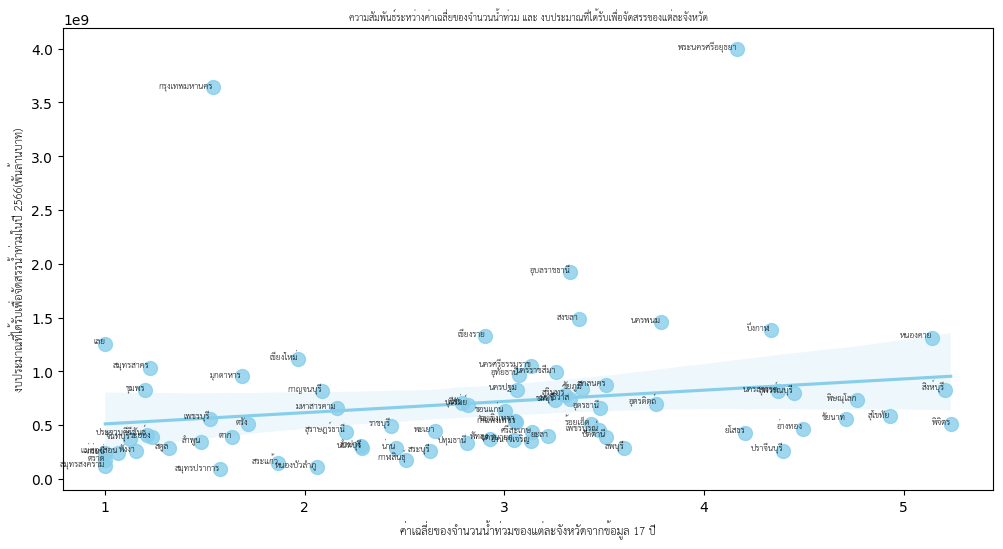

In [ ]:
# สร้าง reg plot เพื่อตรวจสอบความสัมพันธ์
plt.figure(figsize=(12, 6))
sns.regplot(x='Avg_COUNT_17_YEAR', y='Total_Price', data=merged_data, scatter_kws={'s': 100}, color='skyblue')

for i in range(len(merged_data)):
    plt.text(merged_data['Avg_COUNT_17_YEAR'].iloc[i],
             merged_data['Total_Price'].iloc[i],
             merged_data['province'].iloc[i],  # หรือใช้ 'PROV_T' ขึ้นอยู่กับ DataFrame
             fontsize=9,
             ha='right',
             fontproperties=prop
             )

# ตั้งค่าให้แสดงผล
plt.title('ความสัมพันธ์ระหว่างค่าเฉลี่ยของจำนวนน้ำท่วม และ งบประมาณที่ได้รับเพื่อจัดสรรของแต่ละจังหวัด', fontsize=16, fontproperties=prop)
plt.xlabel('ค่าเฉลี่ยของจำนวนน้ำท่วมของแต่ละจังหวัดจากข้อมูล 17 ปี', fontsize=12, fontproperties=prop)
plt.ylabel('งบประมาณที่ได้รับเพื่อจัดสรรน้ำท่วมในปี 2566(พันล้านบาท)', fontsize=12, fontproperties=prop)

# แสดงกราฟ
plt.show()

# **FINAL Project:  Flood Analysis By Budget**
* **มีวัตถุประสงค์**เพื่อทำนายความถี่ที่จะเกิดน้ำท่วมในช่วงฤดูฝนของไทย(เดือนพฤษภาคม - เดือนตุลาคม)
* **เพื่อแก้ปัญหา**การคาดการณ์งบประมาณให้เหมาะสมกับน้ำท่วมในอนาคตของแต่ละพื้นที่


# **Data pre-processing**
ชุดข้อมูลเพิ่มเติม
<br>
3)database ข้อมูลสภาพอากาศในช่วงฤดูฝนของแต่ละจังหวัดในประเทศไทย เป็นเวลาตั้งแต่วันที่ 01/05/2023 ถึง 31/10/2023 >> **for_model_dataframe**
<br>
**แหล่งที่มา**
*   https://www.visualcrossing.com/
*   https://www.visualcrossing.com/resources/documentation/weather-data/weather-data-documentation/

## **รายละเอียดข้อมูลใน for_model_dataframe**
* **name:** province | ชื่อจังหวัดในไทย
* **datetime**
* **tempmax:** Maximum Temperature (C)
* **tempmin:** Minimum Temperature (C)
* **temp:** Temperature (or mean temperature) (C)
* **feelslikemax** (C)
* **feelslikemin** (C)
* **feelslike** (C)
* **dew:** Dew Point (C) | จุดน้ำค้าง อุณหภูมิที่ไอน้ำในอากาศเกิดการอิ่มตัวและเริ่มควบแน่นเป็นหยดน้ำ
* **humidity** (%) | ความชื้นในอากาศ
* **precip:** Precipitation (mm) | ปริมาณน้ำฝนหรือหยาดน้ำจากฟ้าโดยธรรมชาติ ที่ตกลงมาใน 1 วันหรือ 24 ชั่วโมง ต่อ 1 พื้นที่
* **precipcover:** 	Precipitation cover (%) | | นี่คือสัดส่วนของเวลาที่บันทึกปริมาณน้ำฝนที่วัดได้ในช่วงเวลาดังกล่าว โดยแสดงเป็นเปอร์เซ็นต์ ตัวอย่างเช่น หากภายใน 24 ชั่วโมงมีปริมาณน้ำฝนที่วัดได้ 6 ชั่วโมง ปริมาณน้ำฝนที่วัดได้จะเท่ากับ 25% (6/24*100)
* **preciptype:** Precipitation type  | ให้ประเภทของปริมาณน้ำฝนที่คาดว่าจะเกิดขึ้น(rain, snow, freezing rain and ice.)
* **snow** (cm)
* **snowdepth** (cm)
* **windgust** (kph) | ความเร็วลมสูงสุด ณ ช่วงเวลานั้น
* **windspeed** (kph) | ความเร็วลเฉลี่ย ณ ช่วงเวลานั้น
* **winddir:** 	Wind direction ([0,360] degrees)
  * 0 degrees (from the North)
  * 90 degrees (from the east)
  * 180 degrees (from the south)
  * 270 (from the west)
* **sealevelpressure** (mb) | ความดันบรรยากาศที่ตำแหน่งใดตำแหน่งหนึ่งซึ่งส่งผลให้ความดันลดลงเนื่องจากระดับความสูงของตำแหน่งนั้น
* **cloudcover** (%)
* **visibility** | ทัศนวิสัยคือระยะทางที่สามารถมองเห็นได้ในเวลากลางวัน ซึ่งอธิบายถึงปรากฏการณ์สภาพอากาศ(haze, mist, fog or smoke)
* **solarradiation** (W/m2)
* **solarenergy** (MJ/m2)
* **uvindex**
* **severerisk** ([0,1])| แสดงถึงความเสี่ยงของการเกิดพายุ (e.g. thunderstorms, hail and tornadoes)
* **sunrise**
* **sunset**
* **moonphase** ([0,1])
  * 0 – new moon
  * 0-0.25 – waxing crescent
  * 0.25 – first quarter
  * 0.25-0.5 – waxing gibbous
  * 0.5 – full moon
  * 0.5-0.75 – waning gibbous
  * 0.75 – last quarter
  * 0.75 -1 – waning crescent
* **conditions:** Short text about the weather or weather type | Notable weather conditions reported at a particular location such as any thunderstorms, rainfall etc. The availability of this data is dependent on the weather station that observed the information and is not reported by all weather stations – the absence of a particular weather type should not be considered evidence that the weather type did not occur. Weather type is only available for historical datasets and relies on the weather stations providing the data.
* **description:** 	Description of the weather for the day
* **status:** A weather status or icon
* **stations:** 	List of weather stations sources

## Read Data

In [ ]:
for_model_dataframe = pd.read_csv('drive/MyDrive/Source_Data_CP462/project/data/dataset3 - climate05 2023-10 2023.csv')

zone_dataframe = pd.read_csv('drive/MyDrive/Source_Data_CP462/project/data/zone.csv')
for_model_dataframe = for_model_dataframe.merge(zone_dataframe, left_on='name', right_on='Province', how='inner')
for_model_dataframe = for_model_dataframe.drop(columns=['Province'])
for_model_dataframe.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,zone
0,ฉะเชิงเทรา,2023-05-01,35.3,25.8,30.2,41.7,25.8,34.2,23.7,69.9,...,7,30,2023-05-01 5:54:30,2023-05-01 18:31:33,0.35,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48429099999,48458099999,E4214,VTBS,48453099999...",ภาคตะวันออก
1,ฉะเชิงเทรา,2023-05-02,35.0,27.8,30.8,43.9,32.4,37.2,25.1,72.6,...,8,60,2023-05-02 5:54:04,2023-05-02 18:31:45,0.39,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"48429099999,48458099999,E4214,VTBS,48453099999...",ภาคตะวันออก
2,ฉะเชิงเทรา,2023-05-03,36.3,28.3,31.6,43.2,34.0,37.7,24.4,66.7,...,7,60,2023-05-03 5:53:38,2023-05-03 18:31:57,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48429099999,48458099999,E4214,48455099999,VTBS...",ภาคตะวันออก
3,ฉะเชิงเทรา,2023-05-04,35.3,28.5,31.7,43.8,34.7,38.5,24.9,68.4,...,7,30,2023-05-04 5:53:13,2023-05-04 18:32:10,0.45,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48429099999,48458099999,E4214,VTBS,48453099999...",ภาคตะวันออก
4,ฉะเชิงเทรา,2023-05-05,36.5,29.3,32.6,46.2,36.2,40.3,25.2,66.5,...,8,60,2023-05-05 5:52:49,2023-05-05 18:32:23,0.48,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"48429099999,48458099999,E4214,VTBS,48453099999...",ภาคตะวันออก


In [ ]:
for_model_dataframe['name'].nunique()

67

## Feature Selection
1.   droup ข้อมูลที่ไม่เกี่ยวข้อง

In [ ]:
#columns_to_drop = ['tempmax','winddir','windgust','tempmin','feelslikemax','feelslikemin','feelslike','sunrise', 'sunset','precipprob', 'description', 'stations', 'conditions', 'preciptype','snow','snowdepth','solarradiation','solarenergy','moonphase']
columns_to_drop = ['sunrise', 'sunset','precipprob', 'description', 'stations', 'conditions','precipcover', 'preciptype','snow','snowdepth','solarradiation','solarenergy','moonphase']
data_cleaned = for_model_dataframe.drop(columns=columns_to_drop)

## Feature Transformation

### Encoding

In [ ]:
data_cleaned['icon'].unique()

array(['rain', 'partly-cloudy-day', 'clear-day', 'cloudy'], dtype=object)

In [ ]:
data_cleaned['zone'].unique()

array(['ภาคตะวันออก', 'ภาคอีสาน', 'ภาคเหนือ', 'ภาคกลาง', 'ภาคใต้'],
      dtype=object)

In [ ]:
df_encoded = pd.get_dummies(data_cleaned, columns=['icon'], drop_first=True)
df_encoded = pd.get_dummies(df_encoded, columns=['zone'], drop_first=True)
print(df_encoded)

              name    datetime  tempmax  tempmin  temp  feelslikemax  \
0       ฉะเชิงเทรา  2023-05-01     35.3     25.8  30.2          41.7   
1       ฉะเชิงเทรา  2023-05-02     35.0     27.8  30.8          43.9   
2       ฉะเชิงเทรา  2023-05-03     36.3     28.3  31.6          43.2   
3       ฉะเชิงเทรา  2023-05-04     35.3     28.5  31.7          43.8   
4       ฉะเชิงเทรา  2023-05-05     36.5     29.3  32.6          46.2   
...            ...         ...      ...      ...   ...           ...   
12323  อุบลราชธานี  2023-10-27     32.0     25.0  27.4          39.2   
12324  อุบลราชธานี  2023-10-28     34.0     24.0  28.5          42.0   
12325  อุบลราชธานี  2023-10-29     33.0     25.0  27.8          42.1   
12326  อุบลราชธานี  2023-10-30     33.0     24.0  26.7          40.6   
12327  อุบลราชธานี  2023-10-31     32.2     23.0  27.5          37.9   

       feelslikemin  feelslike   dew  humidity  ...  visibility  uvindex  \
0              25.8       34.2  23.7      69.9  ...        

## Feature Extraction

แปรงข้อมูลเป็น month

In [ ]:
df_encoded['month'] = pd.to_datetime(df_encoded['datetime']).dt.month
df_encoded = df_encoded.drop(columns='datetime')

ความเปลี่ยนแปรงของอุณหภูมิ = tempmax-tempmin

In [ ]:
df_encoded['temp_change'] = df_encoded['tempmax'] - df_encoded['tempmin']
df_encoded = df_encoded.drop(columns=['tempmax','tempmin'])

เพิ่มส่วนที่จะทำนาย

In [ ]:
grouped_data = flood_dataframe.groupby('PROV_T')['COUNT 17 YEAR'].mean().round(1)
merged_data = df_encoded.merge(grouped_data, left_on='name', right_on='PROV_T', how='inner')
merged_data = merged_data.rename(columns={'COUNT 17 YEAR': 'meanfreqflood'})
merged_data = merged_data.drop(columns='name')

In [ ]:
merged_data

,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,windgust,windspeed,winddir,...,icon_cloudy,icon_partly-cloudy-day,icon_rain,zone_ภาคตะวันออก,zone_ภาคอีสาน,zone_ภาคเหนือ,zone_ภาคใต้,month,temp_change,meanfreqflood
0,30.2,41.7,25.8,34.2,23.7,69.9,0.633,22.0,15.4,122.5,...,False,False,True,True,False,False,False,5,9.5,3.1
1,30.8,43.9,32.4,37.2,25.1,72.6,2.386,24.5,21.1,180.0,...,False,False,True,True,False,False,False,5,7.2,3.1
2,31.6,43.2,34.0,37.7,24.4,66.7,0.000,29.5,22.9,200.9,...,False,True,False,True,False,False,False,5,8.0,3.1
3,31.7,43.8,34.7,38.5,24.9,68.4,0.000,29.9,21.4,195.2,...,False,True,False,True,False,False,False,5,6.8,3.1
4,32.6,46.2,36.2,40.3,25.2,66.5,0.000,31.7,20.2,197.2,...,False,True,False,True,False,False,False,5,7.2,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,27.4,39.2,25.0,30.7,25.8,92.1,2.136,10.1,9.4,102.3,...,False,False,True,False,True,False,False,10,7.0,3.3
11956,28.5,42.0,24.0,32.5,24.9,82.4,0.000,11.9,9.4,16.8,...,False,True,False,False,True,False,False,10,10.0,3.3
11957,27.8,42.1,25.0,31.2,25.1,86.6,1.888,24.1,16.6,30.2,...,False,False,True,False,True,False,False,10,8.0,3.3
11958,26.7,40.6,24.0,28.7,24.8,90.7,11.960,46.1,23.9,28.6,...,False,False,True,False,True,False,False,10,9.0,3.3


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    11960 non-null  float64
 1   feelslikemax            11960 non-null  float64
 2   feelslikemin            11960 non-null  float64
 3   feelslike               11960 non-null  float64
 4   dew                     11960 non-null  float64
 5   humidity                11960 non-null  float64
 6   precip                  11960 non-null  float64
 7   windgust                11960 non-null  float64
 8   windspeed               11960 non-null  float64
 9   winddir                 11960 non-null  float64
 10  sealevelpressure        11960 non-null  float64
 11  cloudcover              11960 non-null  float64
 12  visibility              11960 non-null  float64
 13  uvindex                 11960 non-null  int64  
 14  severerisk              11960 non-null

In [ ]:
merged_data.isnull().any()

,0
temp,False
feelslikemax,False
feelslikemin,False
feelslike,False
dew,False
humidity,False
precip,False
windgust,False
windspeed,False
winddir,False


In [ ]:
flood_dataframe.duplicated().sum()

0

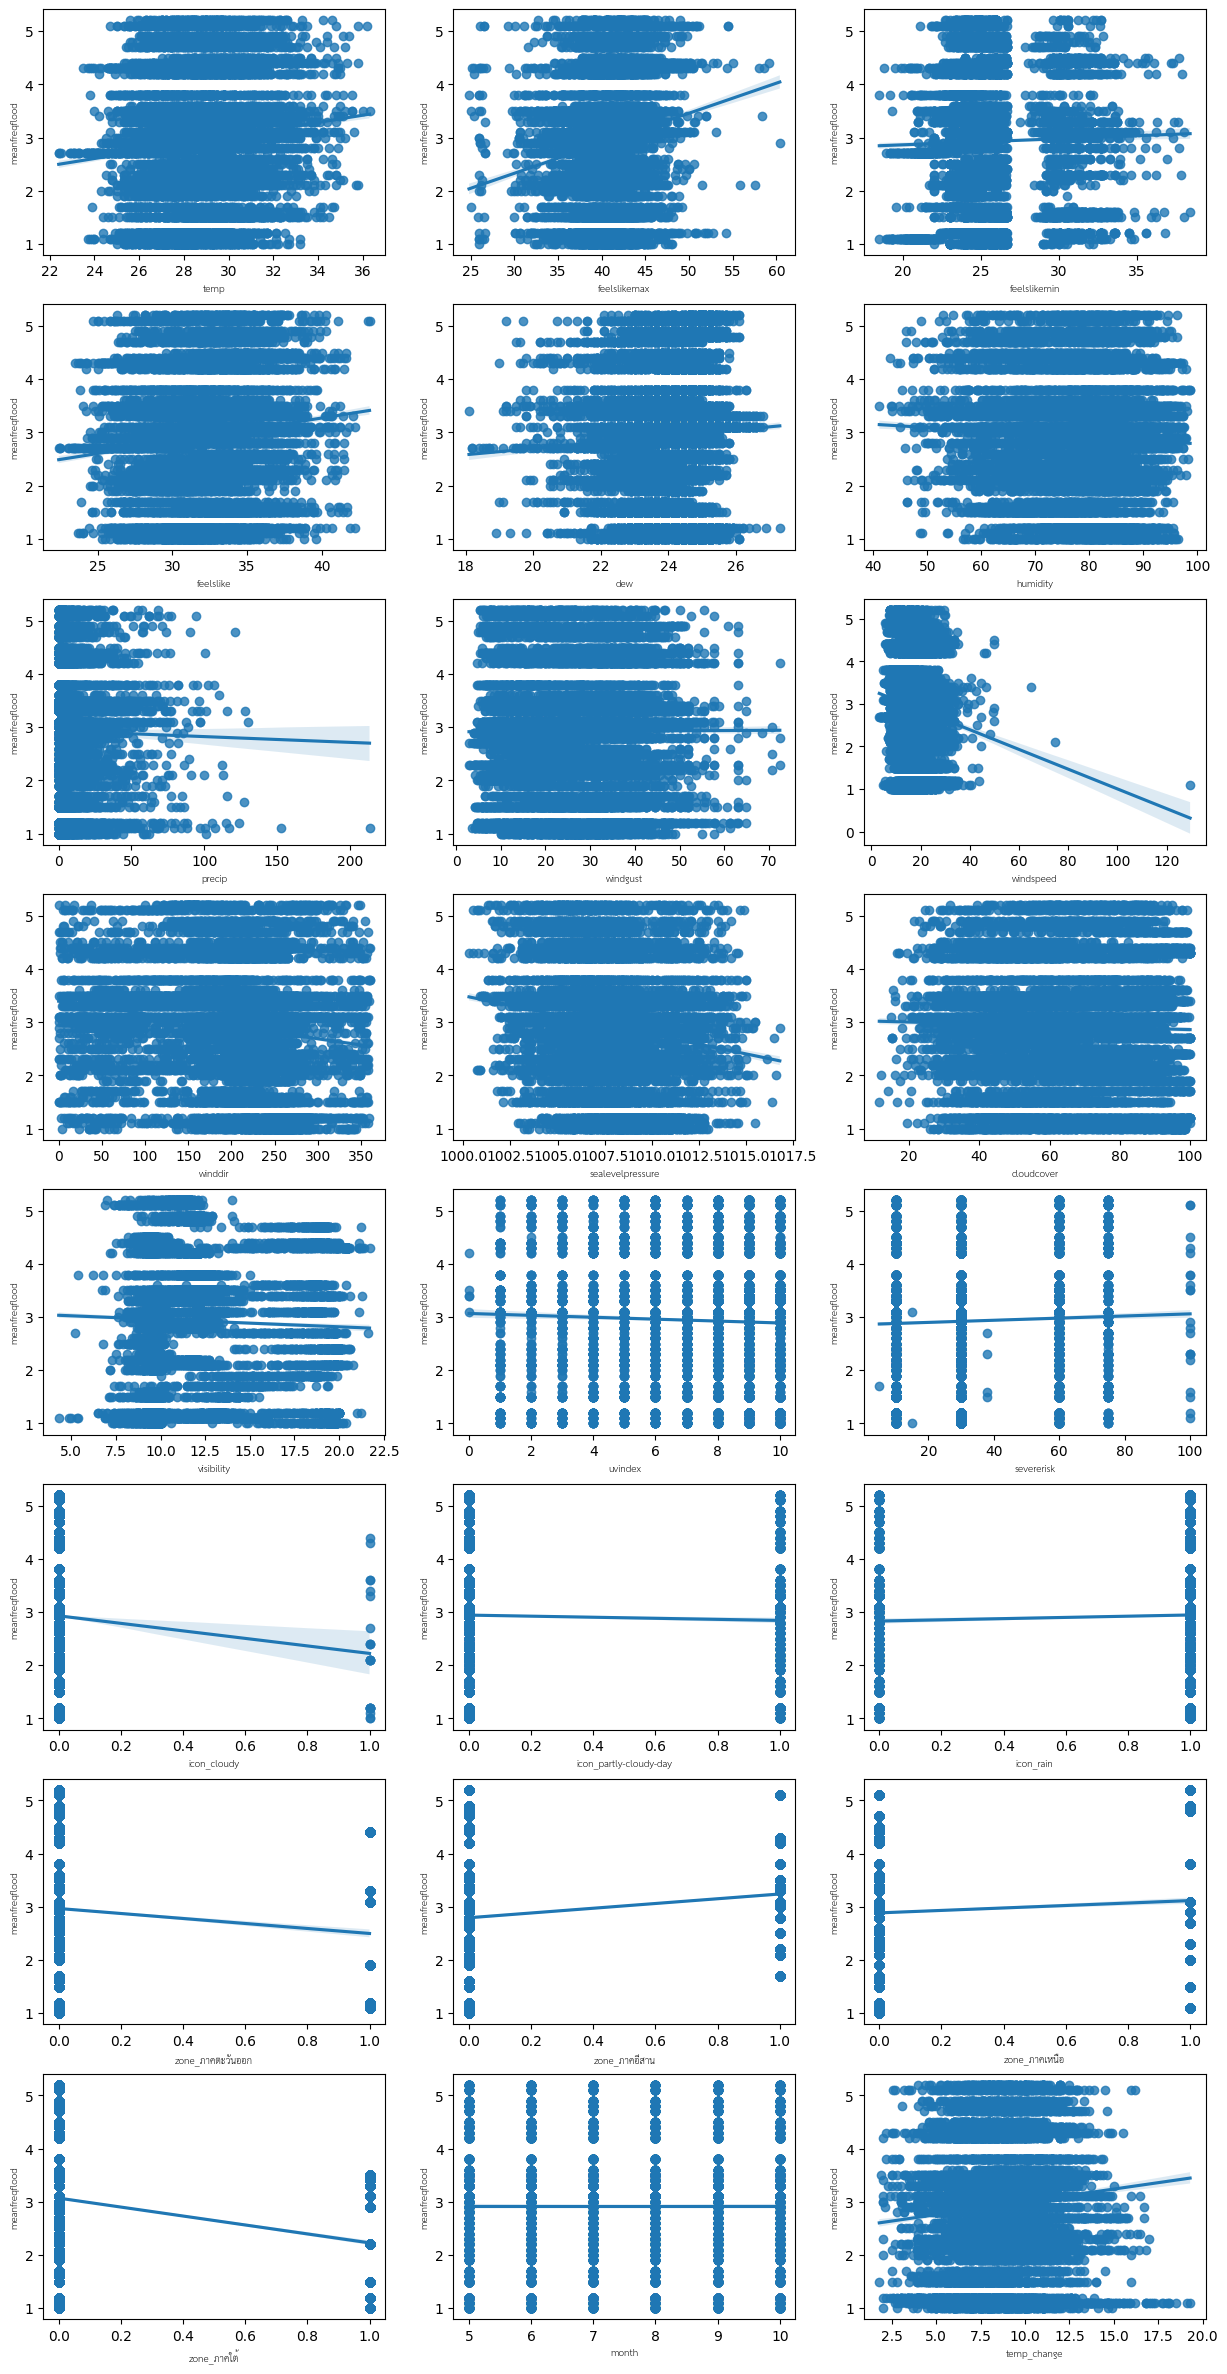

In [ ]:
import math

features = merged_data.columns[:-1]
target = merged_data.columns[-1]

num_column = 3
num_row = math.ceil((merged_data.shape[1]-1)/num_column)

fig, ax = plt.subplots(nrows=num_row, ncols=num_column, figsize=(15, 30))
for i, feature in enumerate(features):
  sns.regplot(x=feature, y=target, data=merged_data, ax=ax[i//3, i%3])
  ax[i//3, i%3].set_xlabel(feature, fontproperties=prop) # Apply Thai font to x-axis label
  ax[i//3, i%3].set_ylabel(target, fontproperties=prop) # Apply Thai font to y-axis label

plt.show()

## Train/Test split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression

X = merged_data.loc[:, features].values
y = merged_data.loc[:, target].values

binner = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
y_binned = binner.fit_transform(y.reshape(-1, 1)).reshape(-1)

# 3. แบ่ง Train และ Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y_binned, random_state=42)

print(f"The number of training data is {len(X_train)} samples")
print(f"The number of test data is {len(X_test)} samples")

The number of training data is 9568 samples
The number of test data is 2392 samples


## StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1) Multiple Linear Regression Model

## Model Traning

In [ ]:
reg = LinearRegression()

reg.fit(X_train_scaled, y_train)

LinearRegression()

## Evaluation

In [ ]:
reg.coef_

array([ 0.4262623 ,  0.25463162, -0.10505443, -0.30125147,  0.14940311,
       -0.05456258, -0.00477748,  0.06015909, -0.07992023, -0.15921881,
       -0.07528563, -0.04605995, -0.03844056, -0.12069596, -0.0672925 ,
        0.03227372,  0.26168471,  0.34253935, -0.12865272,  0.10775169,
        0.07117321, -0.23264573,  0.12144489, -0.04952118])

In [ ]:
reg.intercept_

2.9238503344480784

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

mse_train = mean_squared_error(y_train, reg.predict(X_train_scaled))
print("train set")
print("Mean squared error: %.2f" % mse_train)
print("Root Mean squared error: %.2f" % np.sqrt(mse_train))
print("R² score: {:.2f}".format(reg.score(X_train_scaled, y_train)))

mse_test= mean_squared_error(y_test, reg.predict(X_test_scaled))
print("\ntest set")
print("Mean squared error: %.2f" % mse_test)
print("Root Mean squared error: %.2f" % np.sqrt(mse_test))
print("R² score: {:.2f}".format(reg.score(X_test_scaled, y_test)))

train set
Mean squared error: 0.99
Root Mean squared error: 1.00
R² score: 0.20

test set
Mean squared error: 1.00
Root Mean squared error: 1.00
R² score: 0.19


In [ ]:
%%capture
!pip install shap
import shap

explainer_train = shap.Explainer(reg, X_train_scaled, feature_names=features)
shap_values_train = explainer_train(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3616 (\N{THAI CHARACTER PHO SAMPHAO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3651 (\N{THAI CHARACTER SARA AI MAIMUAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/py

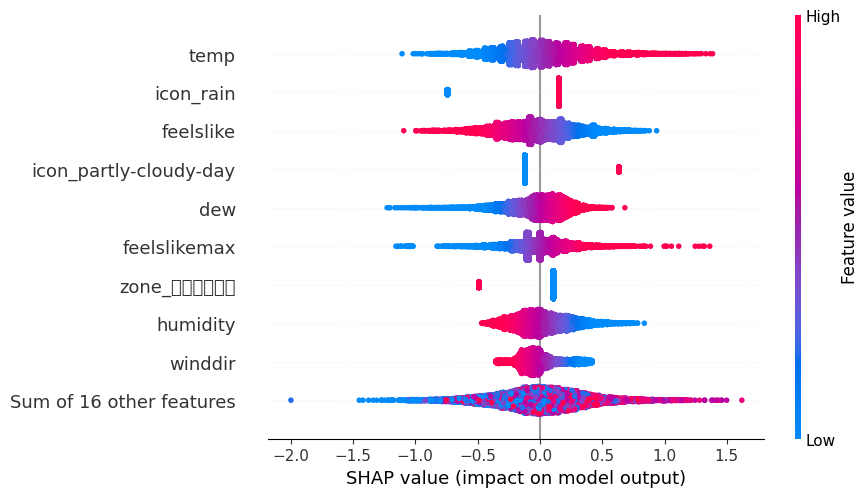

In [ ]:
shap.plots.beeswarm(shap_values_train)
plt.show()

In [ ]:
selected_feature= ['temp','humidity','icon_rain','dew','feelslikemax','windspeed']
X = merged_data.loc[:, selected_feature].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y_binned, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = LinearRegression()

reg.fit(X_train_scaled, y_train)

y_predict = reg.predict(X_test_scaled)

# Print R² scores
print("Training set R² score: {:.2f}".format(reg.score(X_train_scaled, y_train)))
print("Test set R² score: {:.2f}".format(reg.score(X_test_scaled, y_test)))

# The mean squared error
mse_test = mean_squared_error(y_test, y_predict)
print("Mean squared error: %.2f" % mse_test)

Training set R² score: 0.05
Test set R² score: 0.06
Mean squared error: 1.17


## สรุปผล
ได้ผลลัพท์ไม่ค่อยดีเนื่องจากมีความซับซ้อนของข้อมูล และ ข้อมูลไม่ได้มีความสัมพันธ์ในรูปแบบเชิงเส้น

# 2) Elastic Net

Elastic Net แบบไม่ gridserch

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train_scaled, y_train)

print("train set")
print(f"Mean Squared Error: {mean_squared_error(y_train, reg.predict(X_train_scaled))}")
print(f"Root Mean Squared Error: {np.square(mean_squared_error(y_train, reg.predict(X_train_scaled)))}")
print(f"R² score: {r2_score(y_train, reg.predict(X_train_scaled))}")

# Make predictions
y_pred = elastic_net.predict(X_test_scaled)

print("\ntest set")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.square(mean_squared_error(y_test, y_pred))}")
print(f"R² score: {r2_score(y_test, y_pred)}")

train set
Mean Squared Error: 0.995958690250355
Root Mean Squared Error: 0.9919337126852026
R² score: 0.1960728093551547

test set
Mean Squared Error: 1.0530141468659722
Root Mean Squared Error: 1.1088387934998711
R² score: 0.154105485873834


<font color='red'>ไม่ควรกดรันใหม่เพราะใช้เวลานาน 1 hr 47 m</font>

Elastic Net แบบ gridserch

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import numpy as np

model = Pipeline([('poly', PolynomialFeatures()),
                  ('elasticnet', ElasticNet())])

param_grid = {
    'poly__degree': [2, 3],  # Try polynomial degrees 2 and 3
    'elasticnet__alpha': np.logspace(-4, -1, 10).tolist(),  # Range of alpha values
    'elasticnet__l1_ratio': [0.01, .1, 0.5, 1]  # Range of l1_ratio values
}

grid = GridSearchCV(model, param_grid, cv=5, return_train_score=True)

grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)

best_model = grid.best_estimator_

mse_train_en = mean_squared_error(y_train, best_model.predict(X_train_scaled))
print("\ntrain set")
print("Mean squared error: %.2f" % mse_train_en)
print("Root Mean squared error: %.2f" % np.sqrt(mse_train_en))
print("R² score: {:.2f}".format(best_model.score(X_train_scaled, y_train)))

mse_test_en = mean_squared_error(y_test, best_model.predict(X_test_scaled))
print("\ntest set")
print("Mean squared error: %.2f" % mse_test_en)
print("Root Mean squared error: %.2f" % np.sqrt(mse_test_en))
print("R² score: {:.2f}".format(best_model.score(X_test_scaled, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.592e+03, tolerance: 9.614e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.557e+03, tolerance: 9.507e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.532e+03, tolerance: 9.471e

In [ ]:
print("Best parameters:", grid.best_params_)

best_model = grid.best_estimator_

mse_train_en = mean_squared_error(y_train, best_model.predict(X_train_scaled))
print("\ntrain set")
print("Mean squared error: %.2f" % mse_train_en)
print("Root Mean squared error: %.2f" % np.sqrt(mse_train_en))
print("R² score: {:.2f}".format(best_model.score(X_train_scaled, y_train)))

mse_test_en = mean_squared_error(y_test, best_model.predict(X_test_scaled))
print("\ntest set")
print("Mean squared error: %.2f" % mse_test_en)
print("Root Mean squared error: %.2f" % np.sqrt(mse_test_en))
print("R² score: {:.2f}".format(best_model.score(X_test_scaled, y_test)))

Best parameters: {'elasticnet__alpha': 0.002154434690031882, 'elasticnet__l1_ratio': 0.5, 'poly__degree': 3}

train set
Mean squared error: 0.42
Root Mean squared error: 0.65
R² score: 0.66

test set
Mean squared error: 0.57
Root Mean squared error: 0.75
R² score: 0.55


# 3) RandomForestRegressor Model
Random Forest Regression คือการใช้หลายๆ Decision Trees มาทำนายค่า โดยแต่ละต้นไม้จะทำการทำนาย แล้วค่าผลลัพธ์จะถูกเฉลี่ย (ในกรณีของ regression) เพื่อให้ได้ค่าที่แม่นยำขึ้น
เป็นโมเดลที่ทำงานได้ดีในหลายกรณี โดยเฉพาะในกรณีที่ข้อมูลมีความซับซ้อนสูง

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train a Random Forest Regressor as a baseline model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse_train = rf_model.score(X_train, y_train)
mse_test = mean_squared_error(y_test, y_pred)

print("train set")
print(f"Mean Square Error: {mse_train}")
print(f"Root Mean Square Error: {np.sqrt(mse_train)}")
print(f"R²: {r2_score(y_train, rf_model.predict(X_train))}")

print("\ntest set")
print(f"MSE_TEST: {mse_test}")
print(f"RMSE_TEST: {np.sqrt(mse_test)}")
print(f"R²: {r2_score(y_test, y_pred)}")

train set
Mean Square Error: 0.9565814992707787
Root Mean Square Error: 0.9780498449827487
R²: 0.9565814992707787

test set
MSE_TEST: 0.40088354556856176
RMSE_TEST: 0.6331536508372685
R²: 0.6772927329581618


# **Summary**

## ทดลองใช้จริง
ลองนำไปใช้กับข้อมูลในอนาคต 15 วัน ของกรุงเทพ (ใช้จริงต้องดึงมาหลายวันกว่านี้)

### เตรียมข้อมูล

In [ ]:
for_future_test_dataframe = pd.read_csv('drive/MyDrive/Source_Data_CP462/project/data/future_test.csv')

zone_dataframe = pd.read_csv('drive/MyDrive/Source_Data_CP462/project/data/zone.csv')
for_future_test_dataframe = for_future_test_dataframe.merge(zone_dataframe, left_on='name', right_on='Province', how='inner')
for_future_test_dataframe = for_future_test_dataframe.drop(columns=['Province'])

columns_to_drop = ['sunrise', 'sunset','precipprob', 'description', 'stations', 'conditions','precipcover', 'preciptype','snow','snowdepth','solarradiation','solarenergy','moonphase']
data_cleaned2 = for_future_test_dataframe.drop(columns=columns_to_drop)

desired_zone_columns = ['ภาคกลาง', 'ภาคตะวันออก', 'ภาคใต้', 'ภาคอีสาน', 'ภาคเหนือ']
desired_icon_columns = ['clear', 'cloudy','partly-cloudy-day','rain']

# One-hot encoding
df_encoded2 = pd.get_dummies(data_cleaned2, columns=['zone', 'icon'])

# เพิ่มคอลัมน์ที่ขาดใน 'zone'
for col in desired_zone_columns:
    if f'zone_{col}' not in df_encoded2.columns:
        df_encoded2[f'zone_{col}'] = 0

# เพิ่มคอลัมน์ที่ขาดใน 'icon'
for col in desired_icon_columns:
    if f'icon_{col}' not in df_encoded2.columns:
        df_encoded2[f'icon_{col}'] = 0

df_encoded2 = df_encoded2.drop(columns=['zone_ภาคกลาง','icon_clear'])
df_encoded2['month'] = pd.to_datetime(df_encoded2['datetime']).dt.month
df_encoded2 = df_encoded2.drop(columns='datetime')

df_encoded2['temp_change'] = df_encoded2['tempmax'] - df_encoded2['tempmin']
df_encoded2 = df_encoded2.drop(columns=['tempmax','tempmin'])

grouped_data2 = flood_dataframe.groupby('PROV_T')['COUNT 17 YEAR'].mean().round(1)
merged_data2 = df_encoded2.merge(grouped_data2, left_on='name', right_on='PROV_T', how='inner')
merged_data2 = merged_data2.rename(columns={'COUNT 17 YEAR': 'meanfreqflood'})
merged_data2 = merged_data2.drop(columns='name')

X_future = merged_data2.drop(columns=['meanfreqflood'])

# print(X_future.columns)

<ipython-input-92-ede8632e9a21>:27: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_encoded2['month'] = pd.to_datetime(df_encoded2['datetime']).dt.month


### ใช้ Model 1: Multiple Linear Regression Model

In [ ]:
scaler = StandardScaler()
X_future_scaled = scaler.fit_transform(X_future)

y_pred_future = reg.predict(X_future_scaled)
print(np.mean(y_pred_future))

2.9238503344480735


### ใช้ Model 2: Elastic Net

In [ ]:
y_pred_future2 = best_model.predict(X_future_scaled)
print(np.mean(y_pred_future2))

2.8891031839737567
